In [76]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [77]:
print('Python version' + sys.version)
print('Pandas version'+ pd.__version__)
print('Matplotlib version' + matplotlib.__version__)

Python version3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Pandas version0.22.0
Matplotlib version2.1.2


In [78]:
###create test data for analysis
set seed
#np.seed(5)

#Function to generate test data
# define CreateDataSet(Number)
def CreateDataSet(Number=1):
    output=[]
    for i in range(Number):
        # Create a weekly (mondays) date range
        rng=pd.date_range(start='1/1/2009',end='12/31/2012',freq='W-MON')
        # Create random data   25-1000,rng的长度
        data= [np.randint(25,1000) for i in range(len(rng))]
        #data=np.randint(25,1000,size=len(rng))
        # Status pool
        status = [1,2,3]
        # Make a random list of statuses  rng times
        #random_status= [np.randint(1,3) for i in range(len(rng))]
        random_status=[status[np.randint(0,len(status))] for i in range(len(rng))]
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']  
         #Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
        #merge into output
        output.extend(zip(random_states,random_status,data,rng))


    return output

SyntaxError: invalid syntax (<ipython-input-78-856b2bd381cd>, line 2)

In [79]:
dataset = CreateDataSet(4)
df=pd.DataFrame(dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [80]:
df.head()

,State,Status,CustomerCount,StatusDate
0,NJ,1,228,2009-01-05
1,TX,3,431,2009-01-12
2,NY,3,956,2009-01-19
3,NJ,1,132,2009-01-26
4,NY,3,988,2009-02-02


In [81]:
#save results to excel
df.to_excel('lesson3.xlsx',index=False)  #header default True
print('done')

done


In [83]:
# Grab Data from excel
location=r'D:\rotation\LucasLab\Develop\Compensatory-Evolution\Analysis\Siming\Pandas_learning\lesson3.xlsx'
#Parse a specific sheet
df=pd.read_excel(location,0,index_col='StatusDate')
df.head(20)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NJ,1,228
2009-01-12,TX,3,431
2009-01-19,NY,3,956
2009-01-26,NJ,1,132
2009-02-02,NY,3,988
2009-02-09,GA,2,227
2009-02-16,fl,1,185
2009-02-23,FL,3,138
2009-03-02,NJ,1,884


In [84]:
# Grab Data from excel
location=r'D:\rotation\LucasLab\Develop\Compensatory-Evolution\Analysis\Siming\Pandas_learning\lesson3.xlsx'
#Parse a specific sheet
df=pd.read_excel(location,index_col='StatusDate')
df.head()
df.dtypes


State            object
Status            int64
CustomerCount     int64
dtype: object

In [75]:
df.index


DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [85]:
#Prepare Data---clean up data
#1.all in upper class
#2. only select status==1
#3. Merge(NJ and NY) to NY in the state column
#4. Remove any outliners(any odd results in the dataset)

In [86]:
df['State'].unique()

array(['NJ', 'TX', 'NY', 'GA', 'fl', 'FL'], dtype=object)

In [90]:
#use upper() func to convert and apply attribution. Lambda func
#Clean state column,convert to upper case
df['State']=df.State.apply(lambda x:x.upper())
df['State'].unique()

array(['NJ', 'TX', 'NY', 'GA', 'FL'], dtype=object)

In [93]:
#only grab where Status==1
mask=df['Status']==1
mask
df=df[mask]

In [100]:
#Convert NJ to NY
mask=df.State=='NJ'
df['State'][mask]= 'NY'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df['State'].unique()

array(['NY', 'FL', 'TX', 'GA'], dtype=object)

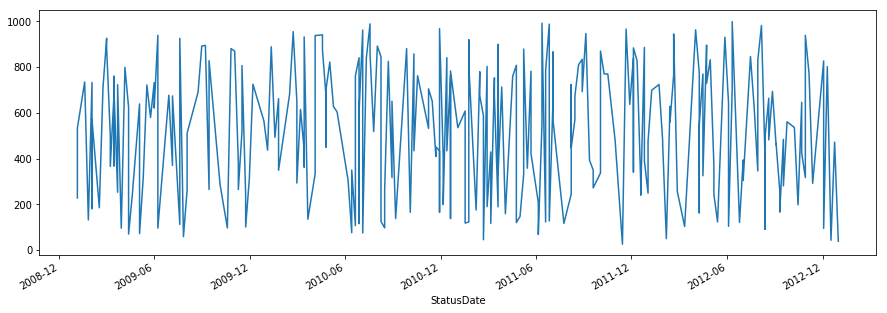

In [102]:
#plot()
df['CustomerCount'].plot(figsize=(15,5));

In [103]:
sortdf=df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,228
2009-01-05,NY,1,533
2009-01-26,NY,1,132
2009-02-02,NY,1,570
2009-02-23,NY,1,710
2009-03-02,NY,1,884
2009-03-09,NY,1,502
2009-03-16,NY,1,676
2009-03-16,NY,1,706


In [104]:
frame=pd.DataFrame(pd.Series([3,5,2,6,9,23,12,34,12,15,11,0]).reshape(3,4),columns=['c','f','d','a'],index=['C','A','B'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [105]:
frame

,c,f,d,a
C,3,5,2,6
A,9,23,12,34
B,12,15,11,0


In [106]:
frame.sort_index()

,c,f,d,a
A,9,23,12,34
B,12,15,11,0
C,3,5,2,6


In [107]:
frame.sort_index(axis=0)

,c,f,d,a
A,9,23,12,34
B,12,15,11,0
C,3,5,2,6


In [108]:
frame.sort_index(axis=1)

,a,c,d,f
C,6,3,2,5
A,34,9,12,23
B,0,12,11,15


In [113]:
# Group by State and StatusDate
Daily=df.reset_index().groupby(['State','StatusDate']).sum()
Daily

Status  CustomerCount
State StatusDate                       
FL    2009-02-02       2            914
      2009-02-16       1            185
      2009-03-02       1            926
      2009-05-11       1            315
      2009-06-08       2           1035
      2009-08-03       2            773
      2009-08-31       1            892
      2009-09-14       1            828
      2009-10-05       1            287
      2009-11-23       1            244
      2009-12-07       1            725
      2010-01-04       1            437
      2010-01-18       1            493
      2010-01-25       2           1011
      2010-03-01       2            944
      2010-03-08       1            615
      2010-03-22       1            135
      2010-04-05       1            938
      2010-04-19       1            876
      2010-04-26       1            666
      2010-05-03       1            822
      2010-05-10       1            628
      2010-06-07       1            305
      2010-07-12       1            841
      2010-07-19       1            989
      2010-08-09       1            125
      2010-08-16       2            360
      2010-09-06       1            138
      2010-11-15       1            651
      2010-12-06       2            611
...                  ...            ...
TX    2010-04-26       1            450
      2010-06-14       1             76
      2010-07-05       1            962
      2010-10-11       1            858
      2010-10-18       1            762
      2010-11-22       1            409
      2010-11-29       2            599
      2010-12-20       1            138
      2011-02-14       1            675
      2011-02-21       2            633
      2011-03-07       1            117
      2011-05-09       1            331
      2011-07-04       1            866
      2011-08-08       1            447
      2011-08-29       1            834
      2011-09-05       1            947
      2011-09-12       1            393
      2011-10-03       1            870
      2011-10-31       1            479
      2011-12-05       2           1225
      2012-02-06       1             50
      2012-02-13       1            593
      2012-05-28       1            931
      2012-06-04       1            643
      2012-07-30       1            831
      2012-08-06       1            982
      2012-08-20       1            482
      2012-08-27       1            694
      2012-10-22       1            425
      2012-11-12       1            292

[234 rows x 2 columns]

In [114]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-02-02            914
      2009-02-16            185
      2009-03-02            926
      2009-05-11            315
      2009-06-08           1035

In [115]:
#What is the index of the dataframe
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-10-05 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-16 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-28 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-15 00:00:00, 2010-02-22 00:00:00, 2010-03-0

In [116]:
#select the state index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [117]:
#select the statusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-19', '2009-01-26', '2009-02-02',
               '2009-02-16', '2009-02-23', '2009-03-02', '2009-03-09',
               '2009-03-16', '2009-03-23',
               ...
               '2012-10-15', '2012-10-22', '2012-10-29', '2012-11-05',
               '2012-11-12', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=166, freq=None)

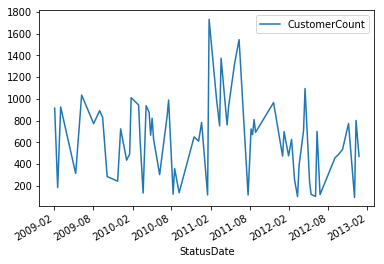

In [118]:
Daily.loc['FL'].plot()

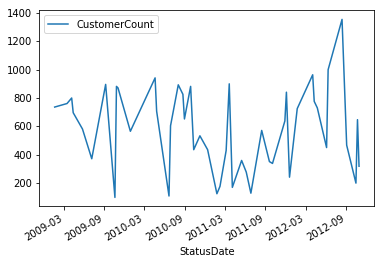

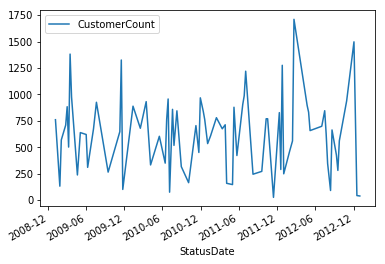

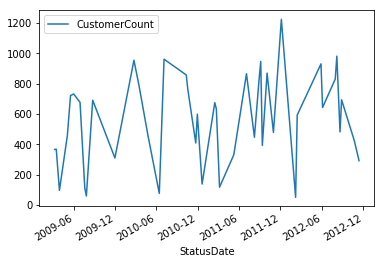

In [121]:
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

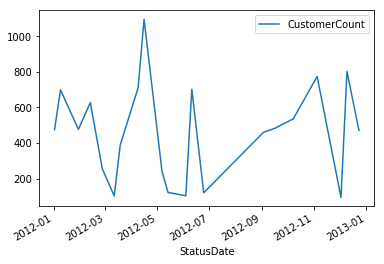

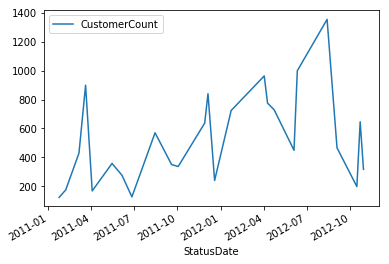

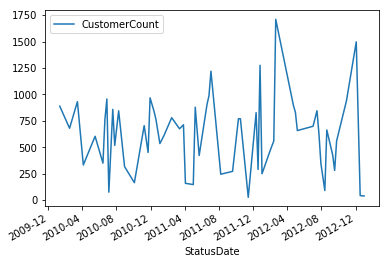

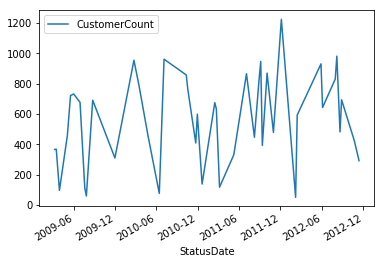

In [122]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2011':].plot()
Daily.loc['NY']['2010':].plot()
Daily.loc['TX']['2009':].plot()